In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


In [ ]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
laptops = pd.read_csv(path)
laptops.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [ ]:
# Drop first 2 columns:
laptops.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Manufacturer', 'Category', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_inch', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_pounds', 'Price', 'Price-binned',
       'Screen-Full_HD', 'Screen-IPS_panel'],
      dtype='object')

In [ ]:
# Drop fist 2 columns
laptops.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace = True)

In [ ]:
laptops.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [ ]:
laptops.dtypes

Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object

In [ ]:
# Get a statistical summary of each column (show only numerial columns)
laptops.describe()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [ ]:
# Get a statistical summary of each column (show object-typed columns)
laptops.describe(include = 'object')

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


In [ ]:
print(laptops.describe(include=['object']))

       Manufacturer Price-binned
count           238          238
unique           11            3
top            Dell          Low
freq             71          160


In [ ]:
# Provide a concise summary of dataframe
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      238 non-null    object 
 1   Category          238 non-null    int64  
 2   GPU               238 non-null    int64  
 3   OS                238 non-null    int64  
 4   CPU_core          238 non-null    int64  
 5   Screen_Size_inch  238 non-null    float64
 6   CPU_frequency     238 non-null    float64
 7   RAM_GB            238 non-null    int64  
 8   Storage_GB_SSD    238 non-null    int64  
 9   Weight_pounds     238 non-null    float64
 10  Price             238 non-null    int64  
 11  Price-binned      238 non-null    object 
 12  Screen-Full_HD    238 non-null    int64  
 13  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 26.2+ KB


(0.0, 3974.15)

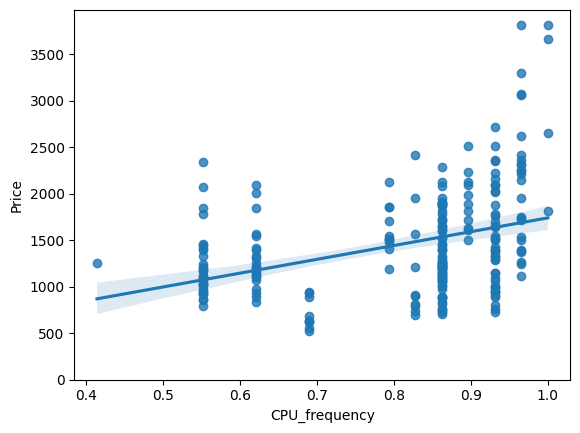

In [ ]:
# Find the scatterplot of "cpu_frequency" and "price"
sns.regplot(x='CPU_frequency', y = 'Price', data = laptops)
plt.ylim(0,)

(0.0, 3974.15)

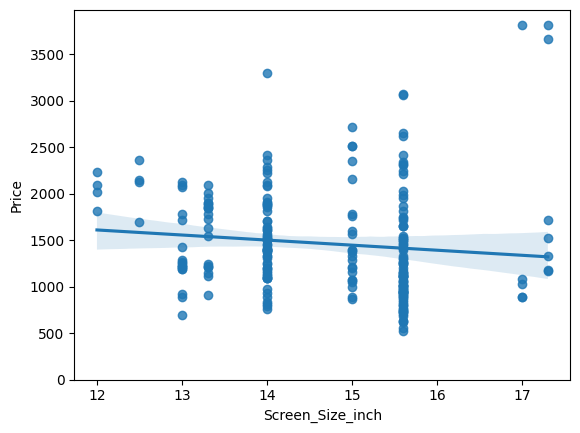

In [ ]:
# the scatterplot of "Screen_Size_inch " and "price"
sns.regplot(x='Screen_Size_inch', y = 'Price', data= laptops)
plt.ylim(0,)

(0.0, 3974.15)

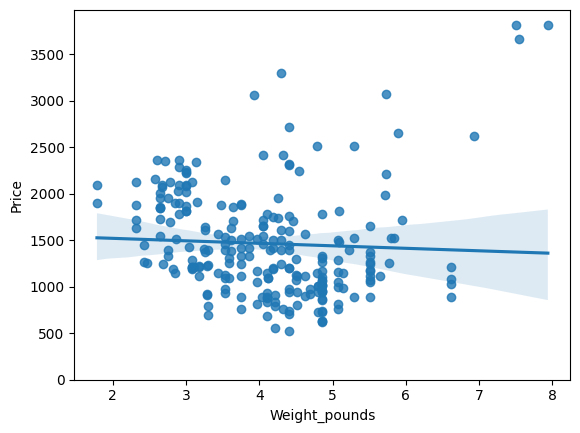

In [ ]:
# the scatterplot of "Weight_pounds " and "price"
sns.regplot(x='Weight_pounds', y='Price', data=laptops)
plt.ylim(0,)

In [ ]:
# The correlation between 'CPU_frequency', "Screen_Size_inch", "Weight_pounds" vs 'price'
laptops[['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds', 'Price']].corr()

,CPU_frequency,Screen_Size_inch,Weight_pounds,Price
CPU_frequency,1.000000,-0.000948,0.066522,0.366666
Screen_Size_inch,-0.000948,1.000000,0.797534,-0.110644
Weight_pounds,0.066522,0.797534,1.000000,-0.050312
Price,0.366666,-0.110644,-0.050312,1.000000


<Axes: xlabel='Category', ylabel='Price'>

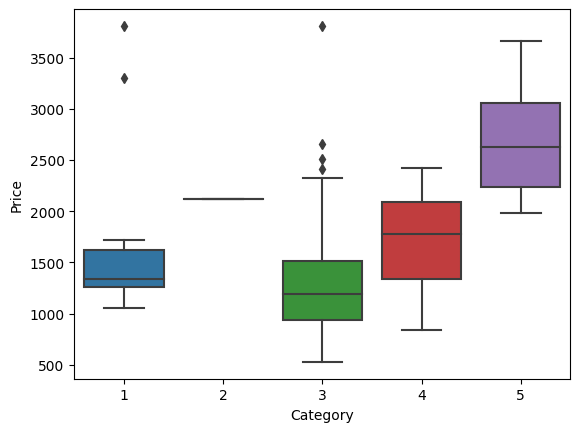

In [ ]:
# The relationship: 'Category' vs 'price'
sns.boxplot(x='Category', y='Price', data=laptops)

<Axes: xlabel='GPU', ylabel='Price'>

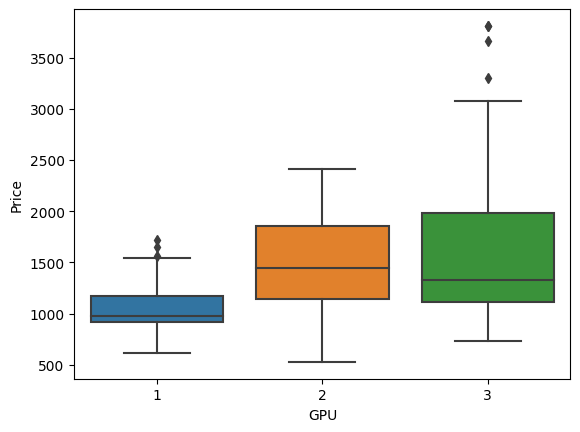

In [ ]:
# The relationship: 'GPU' vs 'price'
sns.boxplot(x='GPU', y='Price', data=laptops)

<Axes: xlabel='OS', ylabel='Price'>

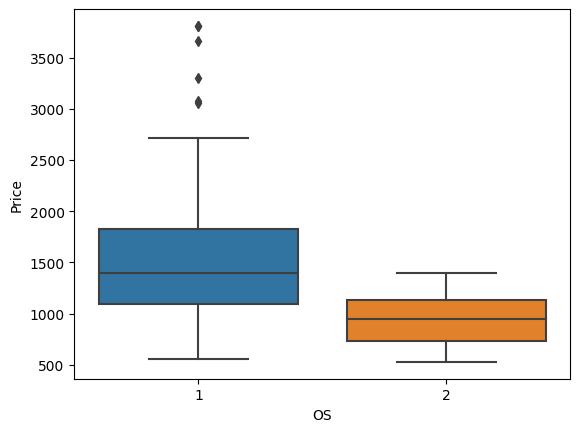

In [ ]:
# The relationship: 'OS' vs 'price'
sns.boxplot(x='OS', y='Price', data=laptops)

<Axes: xlabel='CPU_core', ylabel='Price'>

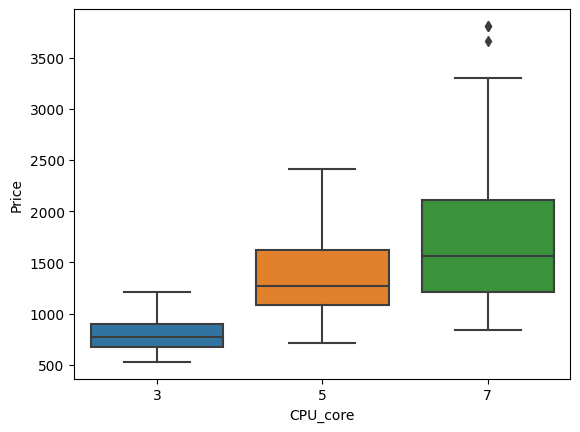

In [ ]:
# The relationship: 'CPU_core' vs 'price'
sns.boxplot(x='CPU_core', y='Price', data=laptops)

<Axes: xlabel='RAM_GB', ylabel='Price'>

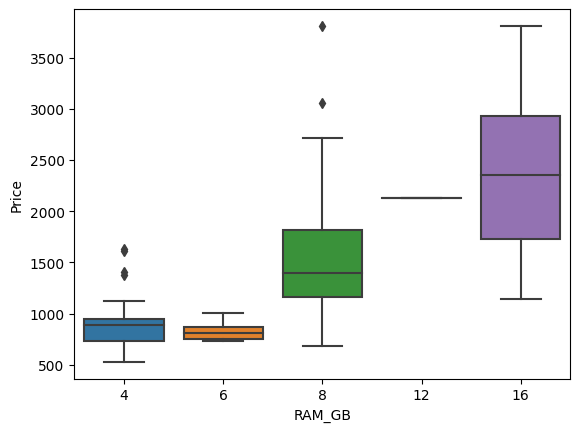

In [ ]:
# The relationship: 'RAM_GB' vs 'price'
sns.boxplot(x='RAM_GB', y='Price', data=laptops)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

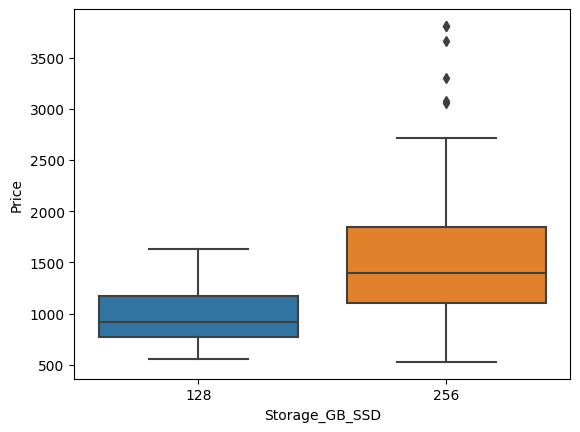

In [ ]:
# The relationship: 'Storage_GB_SSD' vs 'price'
sns.boxplot(x='Storage_GB_SSD', y='Price', data=laptops)

In [ ]:
# Groupby
laptops_g1 = laptops[['GPU', 'CPU_core', 'Price']]
g1 = laptops_g1.groupby(['GPU','CPU_core'], as_index=False).mean()
g1

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [ ]:
# Pivot table
g1_pivot = g1.pivot(index='GPU', columns = 'CPU_core')

In [ ]:
print(g1_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


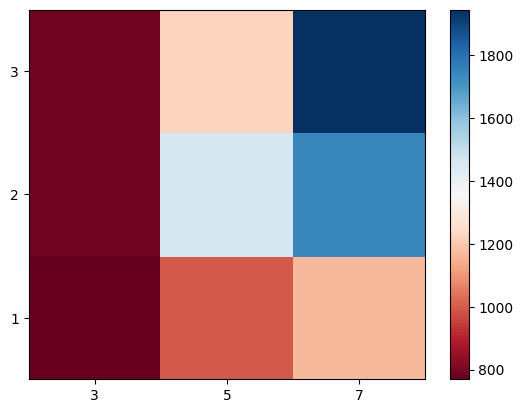

In [ ]:
# Create plot
# Add labels
fig, ax=plt.subplots()
im = ax.pcolor(g1_pivot, cmap ='RdBu')
#Label names
row_labels = g1_pivot.columns.levels[1]
col_labels = g1_pivot.index
# Move ticks and labels to center
ax.set_xticks(np.arange(g1_pivot.shape[1]) +0.5, minor=False)
ax.set_yticks(np.arange(g1_pivot.shape[0]) + 0.5, minor=False)
# Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
plt.show()

In [ ]:
# Calculate the Pearson Correlation Coefficient:
for param in ['RAM_GB', 'CPU_frequency', 'Storage_GB_SSD', 'Screen_Size_inch', 'Weight_pounds', 'CPU_core', 'OS', 'GPU', 'Category']:
  pearson_coef, p_value = stats.pearsonr(laptops[param], laptops['Price'])
  print(param)
  print("The Pearson Correlation Coefficient for ", param, ' is ', pearson_coef, ' with a P-value of P = ', p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is  0.5492972971857844  with a P-value of P =  3.681560628842868e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is  0.36666555892588604  with a P-value of P =  5.5024633507134225e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is  0.2434207552181029  with a P-value of P =  0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is  -0.11064420817118266  with a P-value of P =  0.08853397846830766
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is  -0.05031225837751549  with a P-value of P =  0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is  0.4593977773355115  with a P-value of P =  7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS  is  -0.22172980114827384  with a P-value of P =  0.0005696642559246749
GPU
The Pearson Correlation Coefficient for  GPU  is  0.2882

<h3> Single Linear Regression </h3>
Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction

In [ ]:
lm = LinearRegression()
X = laptops[['CPU_frequency']]
Y = laptops[['Price']]

# Fit the linear model
lm.fit(X, Y)

# Output a prediction
Yhat = lm.predict(X)

<ipython-input-87-f92c9e6f3a70>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(laptops['Price'], hist = False, color = 'r', label = 'Actual Value')
<ipython-input-87-f92c9e6f3a70>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat, hist = False, color = 'b', label = 

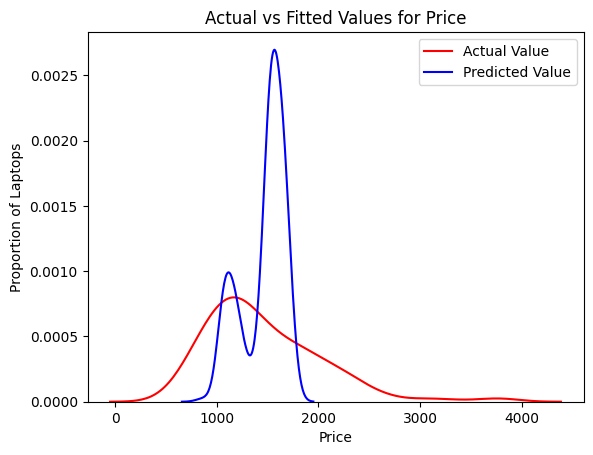

In [ ]:
# Generate the Distribution Plot for the predicted values and that of the actual values. How well did the model perform?
ax1 = sns.distplot(laptops['Price'], hist = False, color = 'r', label = 'Actual Value')

sns.distplot(Yhat, hist = False, color = 'b', label = 'Fitted Values', ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [ ]:
# Evaluate the MSE and R^2 score value for the model:
print('The R-squared is: ', lm.score(X,Y))
mse = mean_squared_error(laptops['Price'], Yhat)
print('The Mean Squared Error is: ', mse )

The R-squared is:  0.1344436321024326
The Mean Squared Error is:  284583.4405868629


<h3> Multiple Linear Regression </h3>
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.

In [ ]:
Z = laptops[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]

# Fit the model:
lm1 = LinearRegression()
lm1.fit(Z, Y)
Y_hat = lm1.predict(Z)

<ipython-input-90-b993ef4cccb5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(laptops['Price'], hist=False, color="r", label="Actual Value")
<ipython-input-90-b993ef4cccb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Val

Text(0, 0.5, 'Proportion of laptops')

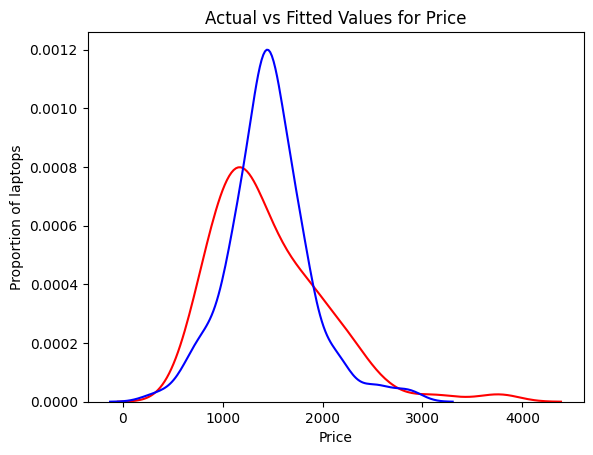

In [ ]:
# Plot the distribution graph of the predicted values as well as the Actual Values:
ax2 = sns.distplot(laptops['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

In [ ]:
# Find the R^2 and MSE
print('The R squared error is :', lm1.score(Z, Y))
mse1 = mean_squared_error(Y, Y_hat)
print('The Mean Squared Error is : ', mse1)

The R squared error is : 0.5082509055187374
The Mean Squared Error is :  161680.57263893107


<h3> Polynomial Regression </h3>
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees.

Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

In [ ]:
x = laptops['CPU_frequency']
y = laptops['Price']
f1 = np.polyfit(x, y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(x, y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(x, y, 5)
p5 = np.poly1d(f5)

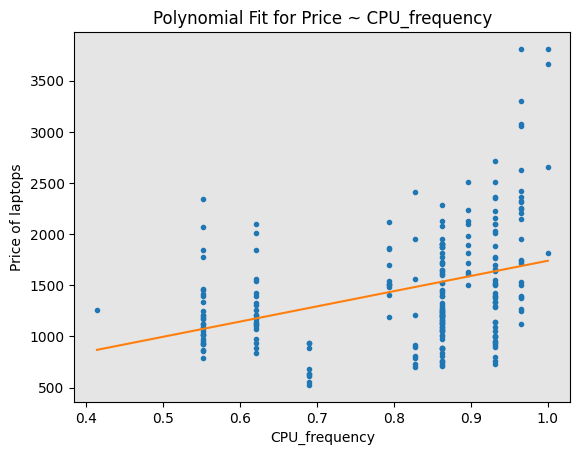

In [ ]:
PlotPolly(p1, x, y, 'CPU_frequency')

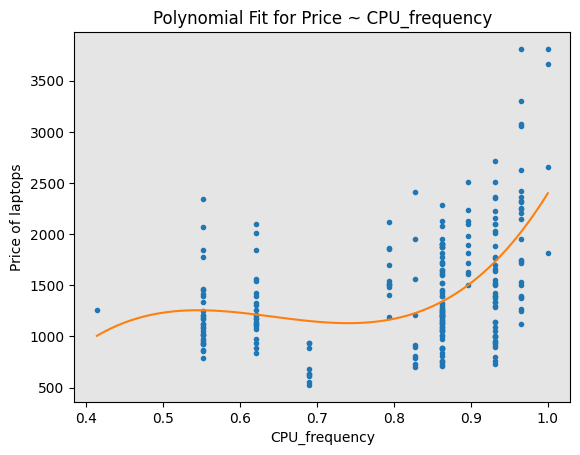

In [ ]:
PlotPolly(p3, x, y, 'CPU_frequency')

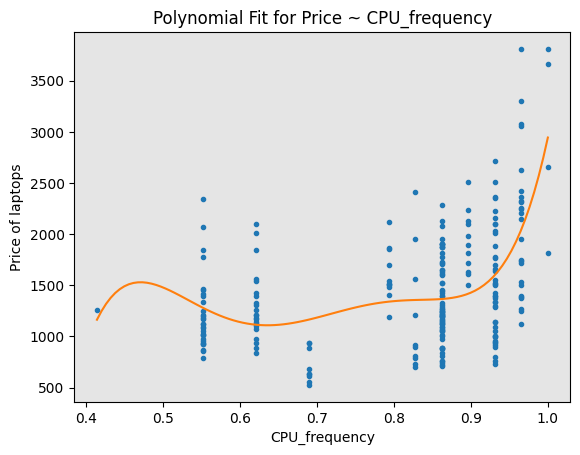

In [ ]:
PlotPolly(p5, x, y, 'CPU_frequency')

In [ ]:
# Calculate the R^2 and MSE values for these fits:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.26692640796531175
The MSE value for 3rd degree polynomial is:  241024.86303848747
The R-square value for 5th degree polynomial is:  0.3030822706443108
The MSE value for 5th degree polynomial is:  229137.2954805611


<h3>Pipeline</h3>


In [ ]:
# Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [ ]:
# Evaluate the MSE and R^2 values for the this predicted output
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  120608.94676913734
R^2 for multi-variable polynomial pipeline is:  0.633169654263205


### Using Cross Validation to improve the model

In [ ]:
# Divide the dataset into x_data, y_data
y_data = laptops['Price']
x_data = laptops.drop('Price', axis = 1)


In [ ]:
# Split dataset into training and testing subsets as 10% for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 1)
print('Number of test samples :', x_test.shape[0])
print('Number of training samples : ', x_train.shape[0])

Number of test samples : 24
Number of training samples :  214


In [ ]:
# Create a single variable linear regression model
lre = LinearRegression()
lre.fit(x_train[['CPU_frequency']], y_train)
print(lre.score(x_test[['CPU_frequency']], y_test))
print(lre.score(x_train[['CPU_frequency']], y_train))

-0.06599437350393789
0.14829792099817973


In [ ]:
# Run a 4-fold cross validation on the model and print the mean value of R^2 score along with its standard deviation
Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv=4)
print('The mean of the folds are ', Rcross.mean(), 'and the standard deviation is', Rcross.std())

The mean of the folds are  -0.16109232388595113 and the standard deviation is 0.384957978666471


### Overfitting

In [ ]:
# Split the data set into training and testing components again
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.5, random_state = 0)

In [ ]:
# Create polynomial features using the single attribute to identify the point of overfitting the model
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
  pr = PolynomialFeatures(degree = n)
  x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
  x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
  lre.fit(x_train_pr, y_train)
  Rsqu_test.append(lre.score(x_test_pr, y_test))


Text(0.5, 1.0, 'R^2 Using Test Data')

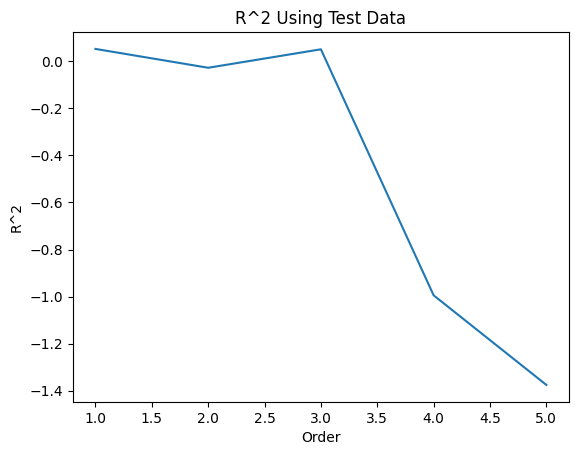

In [ ]:
# Plot the value R^2 scores against the order
plt.plot(order, Rsqu_test)
plt.xlabel('Order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

### Ridge Regression

In [ ]:
# Create a polynomial feature model that uses all these parameters with degree=2
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr = pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

In [111]:
# Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001
from tqdm import tqdm
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001, 1, 0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
  RidgeModel = Ridge(alpha = alpha)
  RidgeModel.fit(x_train_pr, y_train)
  test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
  pbar.set_postfix({'Test Score': test_score, 'Train Score': train_test_split})
  Rsqu_test.append(test_score)
  Rsqu_train.append(train_score)


100%|██████████| 999/999 [00:18<00:00, 54.76it/s, Test Score=0.423, Train Score=<function train_test_split at 0x7c039e1d9480>]


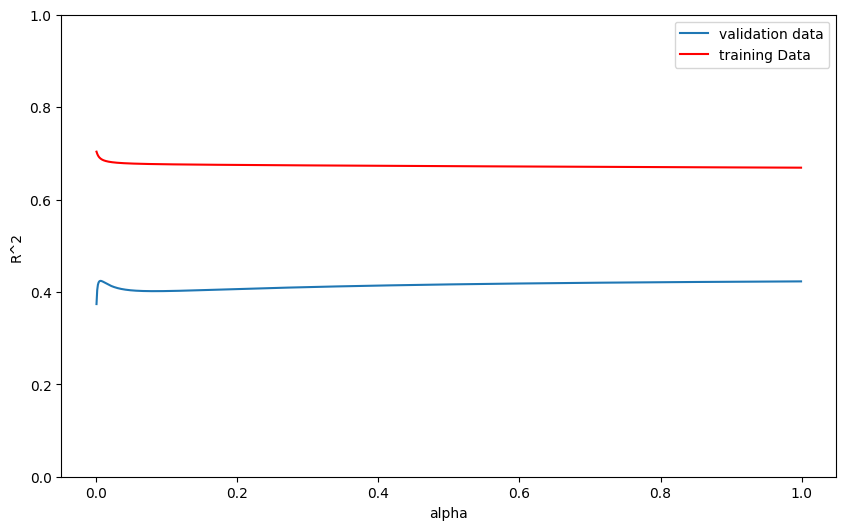

In [112]:
# Plot the R^2 values for training and testing sets with respect to the value of alpha
plt.figure(figsize=(10, 6))
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

# Grid Search

In [113]:
# Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]

In [114]:
# Create a Ridge instance and run Grid Search using a 4 fold cross validation
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [115]:
# Fit the Grid Search to the training data
Grid1.fit(x_data[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_data)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [116]:
# Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha
BestRR=Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

0.4412383966156085
